In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!mv /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d arbethi/diabetic-retinopathy-level-detection

Dataset URL: https://www.kaggle.com/datasets/arbethi/diabetic-retinopathy-level-detection
License(s): CC0-1.0
100% 9.65G/9.66G [07:20<00:00, 26.8MB/s]
100% 9.66G/9.66G [07:20<00:00, 23.5MB/s]


In [ ]:
!unzip /content/diabetic-retinopathy-level-detection.zip -d "/content/drive/My Drive/dataset"


Archive:  /content/diabetic-retinopathy-level-detection.zip
  inflating: /content/drive/My Drive/dataset/inception-diabetic.h5  
  inflating: /content/drive/My Drive/dataset/preprocessed dataset/preprocessed dataset/testing/0/cfb17a7cc8d4.png  
  inflating: /content/drive/My Drive/dataset/preprocessed dataset/preprocessed dataset/testing/0/cfdbaef73a8b.png  
  inflating: /content/drive/My Drive/dataset/preprocessed dataset/preprocessed dataset/testing/0/cfed7c1172ec.png  
  inflating: /content/drive/My Drive/dataset/preprocessed dataset/preprocessed dataset/testing/0/cff262ed8f4c.png  
  inflating: /content/drive/My Drive/dataset/preprocessed dataset/preprocessed dataset/testing/0/cffc50047828.png  
  inflating: /content/drive/My Drive/dataset/preprocessed dataset/preprocessed dataset/testing/0/d02b79fc3200.png  
  inflating: /content/drive/My Drive/dataset/preprocessed dataset/preprocessed dataset/testing/0/d0926ed2c8e5.png  
  inflating: /content/drive/My Drive/dataset/preprocessed d

In [ ]:
import os

# Define the paths to your training and validation directories
train_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/training'
val_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/testing'

# Function to count the number of images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Count the images in the training and validation directories
train_counts = count_images_per_class(train_dir)
val_counts = count_images_per_class(val_dir)

print("Number of images per class in the training set:")
for class_name, num_images in train_counts.items():
    print(f"{class_name}: {num_images}")

print("\nNumber of images per class in the validation set:")
for class_name, num_images in val_counts.items():
    print(f"{class_name}: {num_images}")


Number of images per class in the training set:
0: 1805
1: 370
2: 999
3: 193
4: 295

Number of images per class in the validation set:
0: 361
1: 74
2: 200
3: 39
4: 60


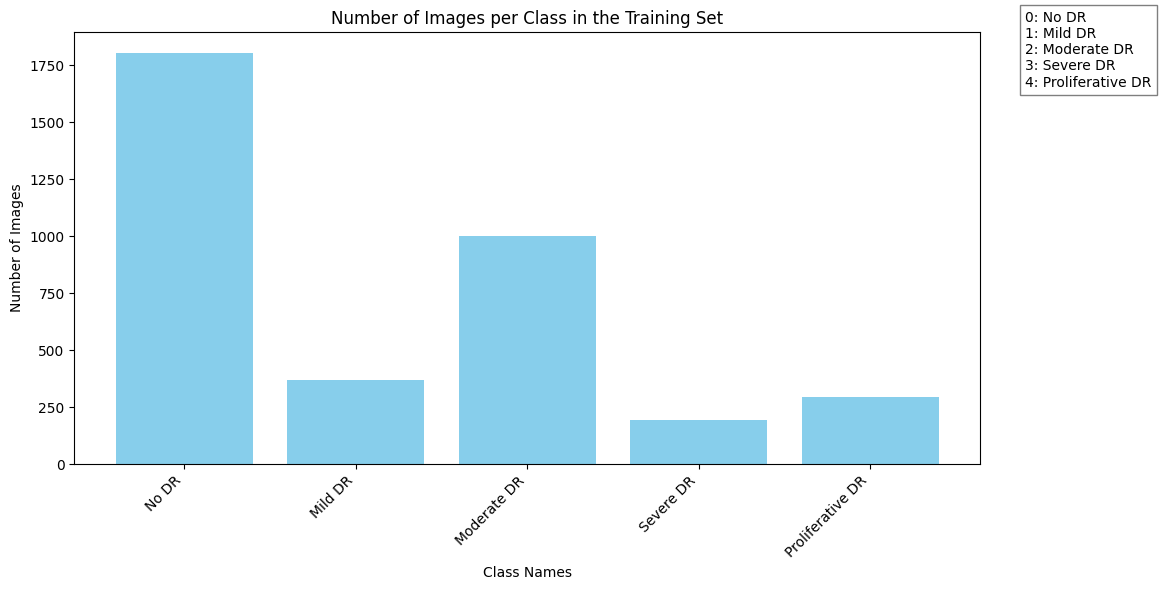

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the paths to your training directory
train_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/training'

# Define a mapping from class names (folder names) to descriptive labels
class_labels = {
    '0': 'No DR',
    '1': 'Mild DR',
    '2': 'Moderate DR',
    '3': 'Severe DR',
    '4': 'Proliferative DR'
}

# Function to count the number of images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Count the images in the training directory
train_counts = count_images_per_class(train_dir)

# Map the numerical class names to descriptive labels
train_counts_mapped = {class_labels.get(k, k): v for k, v in train_counts.items()}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(train_counts_mapped.keys(), train_counts_mapped.values(), color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class in the Training Set')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add the class names at the top right
text_str = "\n".join([f"{k}: {v}" for k, v in class_labels.items()])
plt.text(1.05, 1.05, text_str, transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

# Show the plot
plt.show()


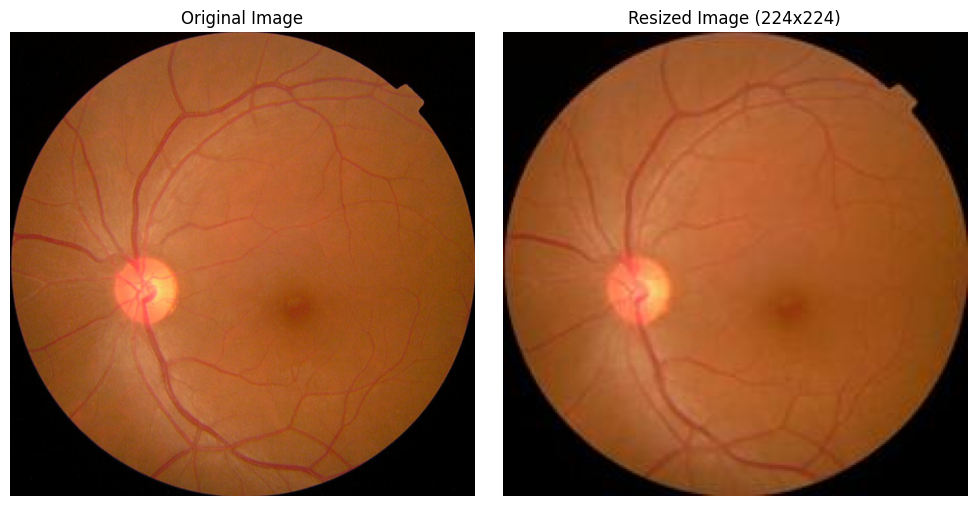

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to your training directory
train_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/training'

# Function to resize an image to 224x224
def resize_image(image_path, output_path):
    image = Image.open(image_path)
    resized_image = image.resize((224, 224))
    resized_image.save(output_path)
    return output_path

# Select one image from the training directory
class_name = os.listdir(train_dir)[0]  # Select the first class
image_name = os.listdir(os.path.join(train_dir, class_name))[0]  # Select the first image in the class
image_path = os.path.join(train_dir, class_name, image_name)

# Path to save the resized image
resized_image_path = '/content/resized_image.jpg'

# Resize the image to 224x224 and save it
resized_image_path = resize_image(image_path, resized_image_path)

# Load the images for displaying
original_image = Image.open(image_path)
resized_image = Image.open(resized_image_path)

# Plotting the images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Display the original image on the left
ax[0].imshow(original_image)
ax[0].axis('off')
ax[0].set_title('Original Image')

# Display the resized image on the right
ax[1].imshow(resized_image)
ax[1].axis('off')
ax[1].set_title('Resized Image (224x224)')

plt.tight_layout()
plt.show()


Feature Extraction


In [ ]:
import numpy as np
import os
import cv2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# Paths to your training and validation directories
train_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/training'
val_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/testing'



datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


In [ ]:


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
def extract_features(generator, base_model):
    features_list = []
    labels_list = []

    for inputs_batch, labels_batch in generator:
        features_batch = base_model.predict(inputs_batch)
        features_list.append(features_batch)
        labels_list.append(labels_batch)
        if len(features_list) * generator.batch_size >= generator.samples:
            break

    features = np.concatenate(features_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return features, labels

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Number of images in the training and validation sets
num_train_images = train_generator.samples
num_val_images = val_generator.samples
print(num_train_images)

3662


In [ ]:
train_features, train_labels = extract_features(train_generator, base_model)

1/1 [==============================] - 7s 7s/step


In [ ]:
val_features, val_labels = extract_features(val_generator, base_model)

1/1 [==============================] - 6s 6s/step


In [ ]:
print(train_features.shape)
print(train_labels.shape)
print(val_features.shape)
print(val_labels.shape)

(3662, 7, 7, 512)
(3662,)
(734, 7, 7, 512)
(734,)


In [ ]:
train_features = train_features.reshape(len(train_features), -1)
val_features = val_features.reshape(len(val_features), -1)

# One-hot encode the labels
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
val_labels = lb.transform(val_labels)

In [ ]:
print(train_features.shape)
print(train_labels.shape)
print(val_features.shape)
print(val_labels.shape)

(3662, 25088)
(3662, 5)
(734, 25088)
(734, 5)


In [ ]:
# Save the features and labels to disk
np.save('/content/drive/MyDrive/train_features_d3.npy', train_features)
np.save('/content/drive/MyDrive/train_labels_d3.npy', train_labels)
np.save('/content/drive/MyDrive/val_features_d3.npy', val_features)
np.save('/content/drive/MyDrive/val_labels_d3.npy', val_labels)
# # Load the features and labels (if needed)
# train_features_flattened = np.load('train_features.npy')
# train_labels = np.load('train_labels.npy')
# val_features_flattened = np.load('val_features.npy')
# val_labels = np.load('val_labels.npy')

In [ ]:
import numpy as np
train_features = np.load('/content/drive/MyDrive/train_features_d3.npy')
train_labels = np.load('/content/drive/MyDrive/train_labels_d3.npy')
val_features = np.load('/content/drive/MyDrive/val_features_d3.npy')
val_labels = np.load('/content/drive/MyDrive/val_labels_d3.npy')

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import joblib


In [ ]:
# Inside your training code where you fit and transform the training features

# Fit and save the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_features)
joblib.dump(scaler, '/content/drive/MyDrive/standard_scaler.pkl')

# Transform the validation features using the fitted scaler
X_val_scaled = scaler.transform(val_features)


In [ ]:
num_classes = train_labels.shape[1]
print(f"Number of classes: {num_classes}")

# Check the shape of the one-hot encoded labels
print(f"Shape of train labels: {train_labels.shape}")
print(f"Shape of validation labels: {val_labels.shape}")


Number of classes: 5
Shape of train labels: (3662, 5)
Shape of validation labels: (734, 5)


In [ ]:
train_labels_flat = np.argmax(train_labels, axis=1)  # Assuming train_labels are one-hot encoded
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels_flat), y=train_labels_flat)
class_weights_dict = dict(enumerate(class_weights))
print(class_weights_dict)

{0: 0.4057617728531856, 1: 1.9794594594594594, 2: 0.7331331331331331, 3: 3.7948186528497407, 4: 2.4827118644067796}


GWO Optimization With Feature Selection

In [ ]:

def cnn_objective_function(params):
    # Extract hyperparameters and feature selection mask
    num_neurons1 = int(params[0])
    num_neurons2 = int(params[1])
    learning_rate = params[2]
    dropout_rate = params[3]
    feature_selection_mask = params[4:]

    # Ensure feature selection mask is binary
    feature_selection_mask = np.where(feature_selection_mask >= 0.5, 1, 0)

    # Select features based on mask
    selected_features = np.where(feature_selection_mask == 1)[0]
    if len(selected_features) == 0:
        return float('inf')  # Penalize solutions with no selected features

    X_train_selected = X_train_scaled[:, selected_features]
    X_val_selected = X_val_scaled[:, selected_features]

    # Build and compile the model
    model = Sequential([
        Dense(num_neurons1, activation='relu', input_shape=(X_train_selected.shape[1],)),
        Dropout(dropout_rate),
        Dense(num_neurons2, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')  # Output layer with num_classes neurons
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train_selected, train_labels, epochs=5, batch_size=32, verbose=0, validation_data=(X_val_selected, val_labels), callbacks=[early_stopping],class_weight=class_weights_dict)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val_selected, val_labels, verbose=0)
    return -val_accuracy  # Return negative accuracy

In [ ]:
def gwo_optimize(obj_function, num_wolves, num_iterations, dim, lower_bound, upper_bound):
    alpha_pos = np.zeros(dim)
    alpha_score = float('inf')

    beta_pos = np.zeros(dim)
    beta_score = float('inf')

    delta_pos = np.zeros(dim)
    delta_score = float('inf')

    wolves_positions = np.random.uniform(lower_bound, upper_bound, (num_wolves, dim))

    for iteration in range(num_iterations):
        for i in range(num_wolves):
            fitness = obj_function(wolves_positions[i])
            if fitness < alpha_score:
                alpha_score = fitness
                alpha_pos = wolves_positions[i].copy()
            elif fitness < beta_score:
                beta_score = fitness
                beta_pos = wolves_positions[i].copy()
            elif fitness < delta_score:
                delta_score = fitness
                delta_pos = wolves_positions[i].copy()

        a = 2 - iteration * (2 / num_iterations)

        for i in range(num_wolves):
            for j in range(dim):
                r1, r2 = np.random.rand(2)
                A1 = 2 * a * r1 - a
                C1 = 2 * r2
                D_alpha = abs(C1 * alpha_pos[j] - wolves_positions[i, j])
                X1 = alpha_pos[j] - A1 * D_alpha

                r1, r2 = np.random.rand(2)
                A2 = 2 * a * r1 - a
                C2 = 2 * r2
                D_beta = abs(C2 * beta_pos[j] - wolves_positions[i, j])
                X2 = beta_pos[j] - A2 * D_beta

                r1, r2 = np.random.rand(2)
                A3 = 2 * a * r1 - a
                C3 = 2 * r2
                D_delta = abs(C3 * delta_pos[j] - wolves_positions[i, j])
                X3 = delta_pos[j] - A3 * D_delta

                wolves_positions[i, j] = (X1 + X2 + X3) / 3
                wolves_positions[i, j] = np.clip(wolves_positions[i, j], lower_bound[j], upper_bound[j])

        print(f"Iteration {iteration+1}/{num_iterations}, Alpha Score: {-alpha_score}")

    return alpha_pos, alpha_score

In [ ]:
num_wolves = 10
num_iterations = 20
dim = 4 + 25088  # 4 for hyperparameters and 25,088 for feature selection
lower_bound = [16, 16, 0.0001, 0.1] + [0] * 25088
upper_bound = [256, 256, 0.01, 0.5] + [1] * 25088

best_params, best_score = gwo_optimize(cnn_objective_function, num_wolves, num_iterations, dim, lower_bound, upper_bound)

# Extract the best hyperparameters
num_neurons1 = int(best_params[0])
num_neurons2 = int(best_params[1])
learning_rate = best_params[2]
dropout_rate = best_params[3]
feature_selection_mask = best_params[4:]

# Get the selected features
selected_features = np.where(feature_selection_mask >= 0.5)[0]

print(f"Best Hyperparameters:")
print(f"Number of neurons in layer 1: {num_neurons1}")
print(f"Number of neurons in layer 2: {num_neurons2}")
print(f"Learning rate: {learning_rate}")
print(f"Dropout rate: {dropout_rate}")

print(f"Number of selected features: {len(selected_features)}")
print(f"Best validation score: {-best_score}")

# Save the selected features indices
np.save('/content/drive/MyDrive/selected_feature_indices_byGWO.npy', selected_features)


Iteration 1/20, Alpha Score: 0.9863760471343994
Iteration 2/20, Alpha Score: 0.9863760471343994
Iteration 3/20, Alpha Score: 0.9877384305000305
Iteration 4/20, Alpha Score: 0.9877384305000305
Iteration 5/20, Alpha Score: 0.9904631972312927
Iteration 6/20, Alpha Score: 0.9904631972312927
Iteration 7/20, Alpha Score: 0.9904631972312927
Iteration 8/20, Alpha Score: 0.9904631972312927
Iteration 9/20, Alpha Score: 0.9904631972312927
Iteration 10/20, Alpha Score: 0.9918256402015686
Iteration 11/20, Alpha Score: 0.9918256402015686
Iteration 12/20, Alpha Score: 0.9945504069328308
Iteration 13/20, Alpha Score: 0.9945504069328308
Iteration 14/20, Alpha Score: 0.9945504069328308
Iteration 15/20, Alpha Score: 0.9945504069328308
Iteration 16/20, Alpha Score: 0.9945504069328308
Iteration 17/20, Alpha Score: 0.9945504069328308
Iteration 18/20, Alpha Score: 0.9945504069328308
Iteration 19/20, Alpha Score: 0.9945504069328308
Iteration 20/20, Alpha Score: 0.9945504069328308
Best Hyperparameters:
Number 

In [ ]:
!pip install --upgrade tensorflow
import tensorflow as tf
tf.keras.backend.clear_session()


Train Data Shape: (3662, 10276) Labels Shape: (3662, 5)
Validation Data Shape: (734, 10276) Labels Shape: (734, 5)
Epoch 1/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.5441 - loss: 2.2107 - val_accuracy: 0.8311 - val_loss: 1.0561
Epoch 2/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.8349 - loss: 1.1123 - val_accuracy: 0.9523 - val_loss: 0.7852
Epoch 3/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.9169 - loss: 0.8793 - val_accuracy: 0.9741 - val_loss: 0.6831
Epoch 4/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9510 - loss: 0.7619 - val_accuracy: 0.9877 - val_loss: 0.6474
Epoch 5/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.9657 - loss: 0.6947 - val_accuracy: 0.9850 - val_loss: 0.6205
Epoch 6/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9675 - loss: 0.6825 - val_accuracy: 0.9932 - val_loss: 0.5873
Epoch 7/25
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9829 - loss: 0.6307 - val_accuracy: 0.9877 -

Validation accuracy: 0.9918256402015686


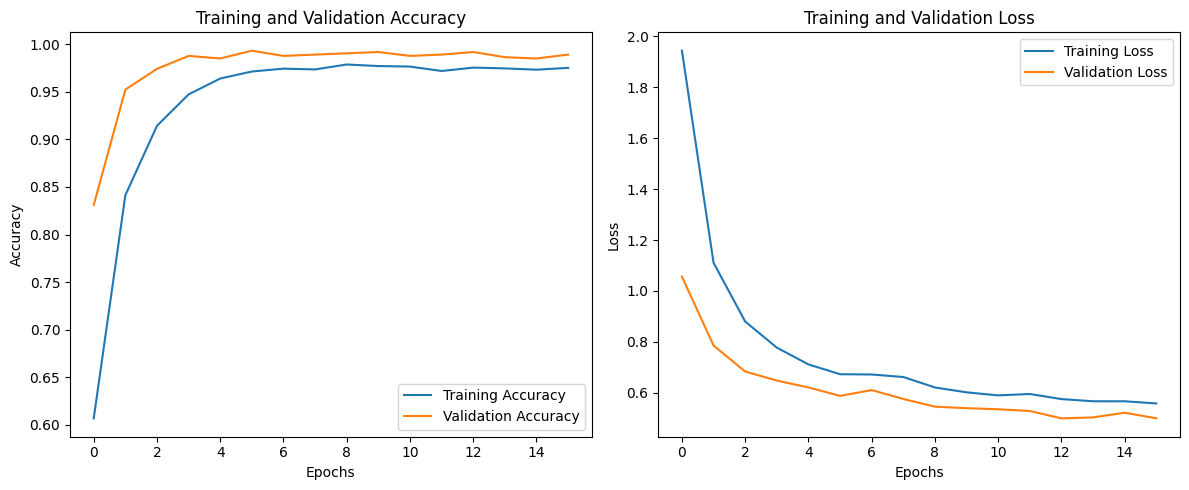

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load selected features indices (from GWO)
selected_features = np.load('/content/drive/MyDrive/selected_feature_indices_byGWO.npy')

# Model Hyperparameters from GWO
neurons_layer1 = 212
neurons_layer2 = 199
learning_rate = 0.0005706062976624917
dropout_rate = 0.16427840128721727
num_classes = 5
epochs = 25
batch_size = 32

# Select Features for Training and Validation
X_train_selected = X_train_scaled[:, selected_features]
X_val_selected = X_val_scaled[:, selected_features]

# Convert to NumPy Array (Ensures Compatibility)
X_train_selected = np.array(X_train_selected)
X_val_selected = np.array(X_val_selected)

# ✅ Debugging: Print dataset shapes before training
print("Train Data Shape:", X_train_selected.shape, "Labels Shape:", train_labels.shape)
print("Validation Data Shape:", X_val_selected.shape, "Labels Shape:", val_labels.shape)

# Define Model Using Fully Connected Layers
model = models.Sequential([
    layers.Input(shape=(len(selected_features),)),  # Input layer with selected features

    layers.Dense(neurons_layer1, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(dropout_rate),

    layers.Dense(neurons_layer2, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(dropout_rate),

    layers.Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the Model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the Model
history = model.fit(
    X_train_selected, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_selected, val_labels),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluate the Model on Validation Set
val_loss, val_accuracy = model.evaluate(X_val_selected, val_labels, verbose=2)
print(f"Validation accuracy: {val_accuracy}")

# Save the Model
model.save('/content/drive/MyDrive/optimized_MLP_GWO_Model_with_Extracted_Features.h5')

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Training and validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Train Data Shape: (3662, 10276) Labels Shape: (3662, 5)
Validation Data Shape: (734, 10276) Labels Shape: (734, 5)
Epoch 1/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 32s 184ms/step - accuracy: 0.5665 - loss: 3.0624 - val_accuracy: 0.0545 - val_loss: 21.7520
Epoch 2/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 27s 112ms/step - accuracy: 0.7676 - loss: 2.6709 - val_accuracy: 0.0531 - val_loss: 17.5590
Epoch 3/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.8554 - loss: 2.3807 - val_accuracy: 0.4196 - val_loss: 5.7586
Epoch 4/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 20s 114ms/step - accuracy: 0.8927 - loss: 2.3547 - val_accuracy: 0.9033 - val_loss: 2.5428
Epoch 5/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.9041 - loss: 2.3863 - val_accuracy: 0.8978 - val_loss: 2.2884
Epoch 6/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 113ms/step - accuracy: 0.9376 - loss: 2.2043 - val_accuracy: 0.9659 - val_loss: 2.0963
Epoch 7/30
115/115 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.9452 - loss: 2.2077 - val_ac

Validation accuracy: 0.9659400582313538


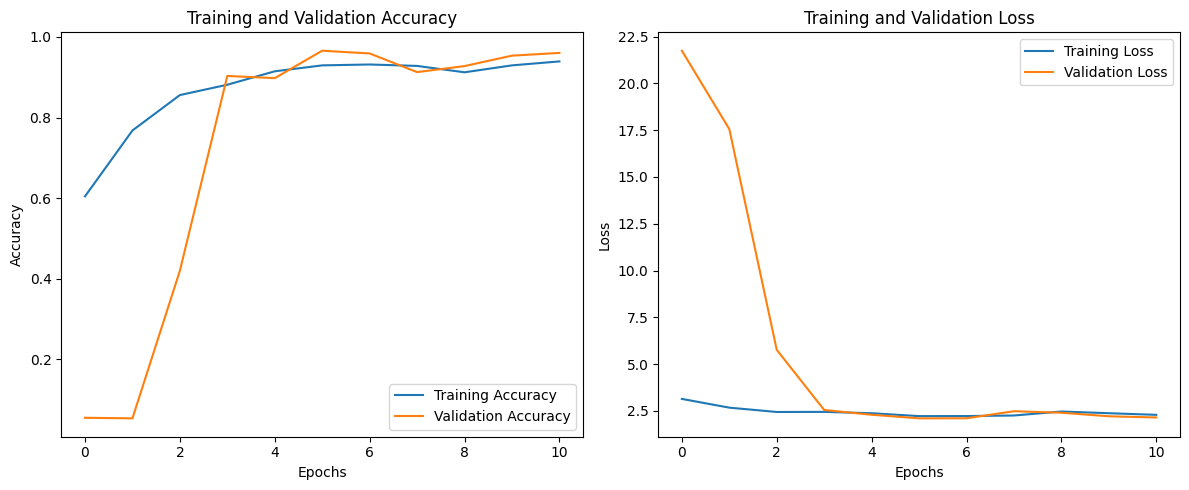

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load selected features indices (from GWO)
selected_features = np.load('/content/drive/MyDrive/selected_feature_indices_byGWO.npy')

# Model Hyperparameters
neurons_layer1 = 212
neurons_layer2 = 199
learning_rate = 0.0005706062976624917
dropout_rate = 0.16427840128721727
num_classes = 5
epochs = 30  # ⬆ Increased from 25 to 50
batch_size = 32
l2_reg = 0.001  # L2 regularization

# Select Features for Training and Validation
X_train_selected = X_train_scaled[:, selected_features]
X_val_selected = X_val_scaled[:, selected_features]

# Convert to NumPy Array (Ensures Compatibility)
X_train_selected = np.array(X_train_selected)
X_val_selected = np.array(X_val_selected)

# ✅ Debugging: Print dataset shapes before training
print("Train Data Shape:", X_train_selected.shape, "Labels Shape:", train_labels.shape)
print("Validation Data Shape:", X_val_selected.shape, "Labels Shape:", val_labels.shape)

# Define CNN Model with Extra Conv1D Layer
model = models.Sequential([
    layers.Input(shape=(len(selected_features), 1)),  # Input layer with selected features
    layers.Reshape((len(selected_features), 1)),  # Reshape for CNN input format

    # 🔹 Convolutional Layers with L2 Regularization
    layers.Conv1D(64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(dropout_rate),

    layers.Conv1D(128, kernel_size=3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(dropout_rate),

    # 🔥 Added an Extra Convolutional Layer (Improves Feature Extraction)
    layers.Conv1D(256, kernel_size=3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(dropout_rate),

    # Flatten before Dense Layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(neurons_layer1, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.Dropout(dropout_rate),

    layers.Dense(neurons_layer2, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
    layers.BatchNormalization(),
    layers.Dropout(dropout_rate),

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

# Compile the Model
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# 🔹 Early Stopping (Patience Increased to 5 for Better Training Stability)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the Model
history = model.fit(
    X_train_selected, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_selected, val_labels),
    callbacks=[early_stopping],
    class_weight=class_weights_dict
)

# Evaluate the Model
val_loss, val_accuracy = model.evaluate(X_val_selected, val_labels, verbose=2)
print(f"Validation accuracy: {val_accuracy}")

# Save the Model
model.save('/content/drive/MyDrive/optimized_CNN_GWO_Model_with_ExtraConvLayer.h5')

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Training and validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Number of selected features: 10276
23/23 [==============================] - 0s 2ms/step
Prediction Accuracy: 0.9904632152588556

Overall Precision: 0.9905212279668816
Overall Recall: 0.9904632152588556
Overall F1 Score: 0.9904718994385516


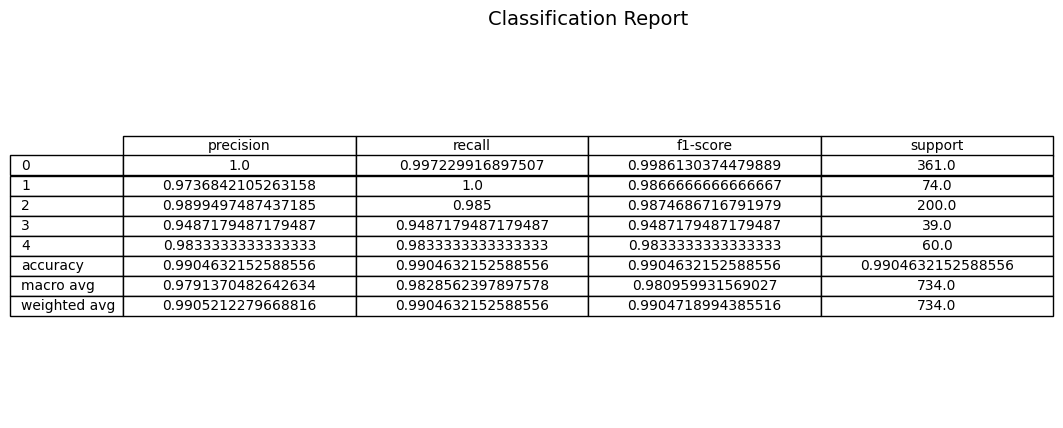


Confusion Matrix (Array Format):
[[360   1   0   0   0]
 [  0  74   0   0   0]
 [  0   1 197   2   0]
 [  0   0   1  37   1]
 [  0   0   1   0  59]]


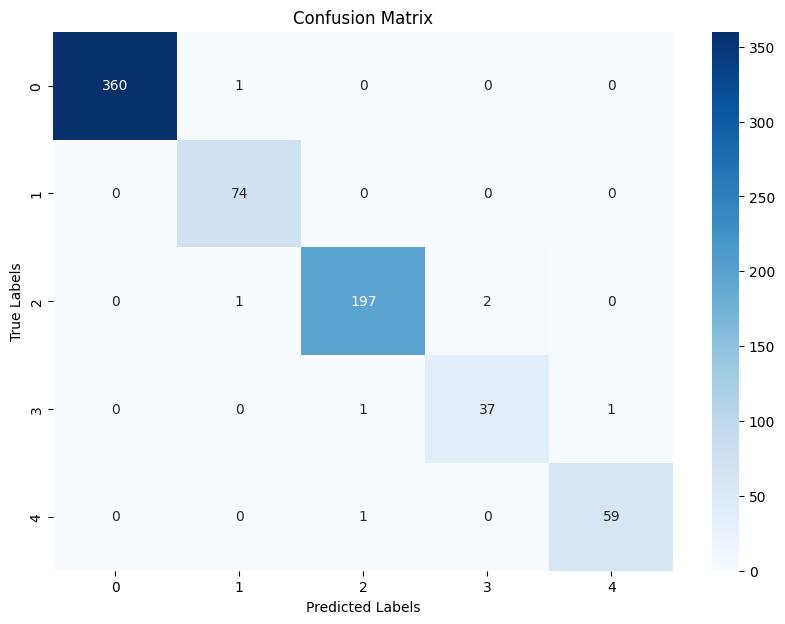


Number of Correct Predictions: 727
Number of Incorrect Predictions: 7


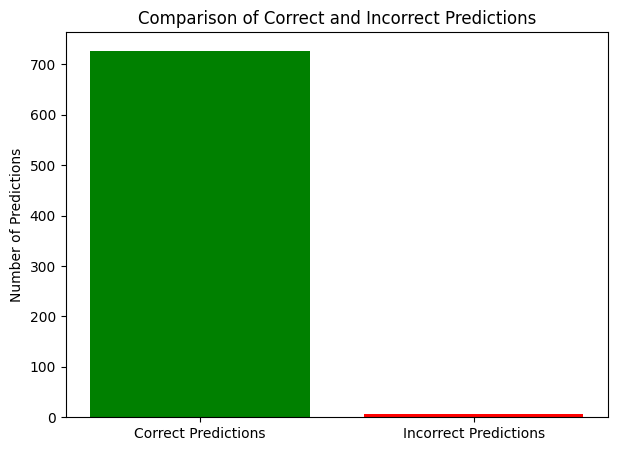


First 5 Incorrect Predictions:
Index: 252, Predicted: 1, True: 0
Index: 530, Predicted: 1, True: 2
Index: 594, Predicted: 3, True: 2
Index: 608, Predicted: 3, True: 2
Index: 640, Predicted: 2, True: 3


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the model
model = load_model('/content/drive/MyDrive/optimized_feature_extracted_GWO_Model.h5')

# Load selected features indices
selected_features = np.load('/content/drive/MyDrive/selected_feature_indices_byGWO.npy')
print(f"Number of selected features: {len(selected_features)}")

# Function to select features based on indices
def select_features(X, selected_features):
    return X[:, selected_features]

# Assuming X_val_scaled is already loaded and scaled
# Select features for validation data
X_val_selected = select_features(X_val_scaled, selected_features)

# Predict using the selected features
predictions = model.predict(X_val_selected)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Prediction Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"\nOverall Precision: {precision}")
print(f"Overall Recall: {recall}")
print(f"Overall F1 Score: {f1}")

# Print classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)
df_report = pd.DataFrame(report).transpose()

# Generate classification report as an image
plt.figure(figsize=(10, 5))
plt.axis('off')
tbl = plt.table(cellText=df_report.values, colLabels=df_report.columns, rowLabels=df_report.index, cellLoc='center', loc='center')
tbl.scale(1.2, 1.2)
plt.title("Classification Report", fontsize=14)
plt.savefig('classification_report.png', bbox_inches='tight', dpi=300)
plt.show()

# Print confusion matrix as an array
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix (Array Format):")
print(conf_matrix)

# Plot the confusion matrix as an image
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

# Calculate the number of correct and incorrect predictions
correct_predictions = np.where(predicted_labels == true_labels)[0]
incorrect_predictions = np.where(predicted_labels != true_labels)[0]

num_correct = len(correct_predictions)
num_incorrect = len(incorrect_predictions)

# Print the number of correct and incorrect predictions
print(f"\nNumber of Correct Predictions: {num_correct}")
print(f"Number of Incorrect Predictions: {num_incorrect}")

# Create a bar plot to compare correct and incorrect predictions
plt.figure(figsize=(7, 5))
labels = ['Correct Predictions', 'Incorrect Predictions']
counts = [num_correct, num_incorrect]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Comparison of Correct and Incorrect Predictions')
plt.ylabel('Number of Predictions')
plt.savefig('correct_vs_incorrect_predictions.png', bbox_inches='tight', dpi=300)
plt.show()

# Optionally, you can inspect the first few incorrect predictions
print(f"\nFirst 5 Incorrect Predictions:")
for i in incorrect_predictions[:5]:
    print(f"Index: {i}, Predicted: {predicted_labels[i]}, True: {true_labels[i]}")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import joblib

# Load the selected feature indices
selected_feature_indices = np.load('/content/drive/MyDrive/selected_feature_indices_2.npy')

# Load the scaler
scaler = joblib.load('/content/drive/MyDrive/standard_scaler.pkl')

def extract_features(img_path, feature_extractor, target_size=(224, 224)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image for VGG16
    img_array = preprocess_input(img_array)

    # Extract features using the feature extractor model
    features = feature_extractor.predict(img_array)

    # Flatten the features to match the model input shape
    features_flat = features.reshape((features.shape[0], -1))

    # Scale the features using the loaded scaler
    features_scaled = scaler.transform(features_flat)

    # Select the relevant features based on the selected feature indices
    selected_features = features_scaled[:, selected_feature_indices]

    return selected_features

def predict_single_image(model, img_path, feature_extractor):
    # Extract features from the image
    selected_features = extract_features(img_path, feature_extractor)

    # Ensure the feature shape matches what the model expects
    if selected_features.shape[1] != model.input_shape[1]:
        raise ValueError(f"Feature shape {selected_features.shape[1]} does not match model input shape {model.input_shape[1]}.")

    # Make prediction
    predictions = model.predict(selected_features)
    predicted_class = np.argmax(predictions, axis=1)

    return predicted_class

# Load the trained model
model = load_model('/content/drive/MyDrive/optimized_extracted_model_2.h5')

# Load VGG16 for feature extraction
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional block
feature_extractor = Model(inputs=vgg16_model.input, outputs=vgg16_model.output)

# Example usage
img_path = '/content/drive/MyDrive/dr_level_detection/preprocessed dataset/preprocessed dataset/testing/1/cfd1bd0fcbb4.png'
predicted_class = predict_single_image(model, img_path, feature_extractor)
print(f"Predicted Class: {predicted_class}")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/selected_feature_indices_2.npy'

checking with direct images with optimization algorithm features


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Parameters
learning_rate = 0.0002917752847222896
dropout_rate = 0.1202509048409723
neurons_layer1 = 150
neurons_layer2 = 94
input_shape = (224, 224, 3)  # Resize images to 224x224, adjust channels if needed
batch_size = 32
num_classes = 5
epochs = 25

# Directories
train_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/training'
val_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/testing'

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Build the model
model = models.Sequential()
model.add(layers.Input(shape=input_shape))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(neurons_layer1, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(neurons_layer2, activation='relu'))
model.add(layers.Dropout(dropout_rate))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Using categorical cross-entropy
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(val_generator, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the model
model.save('optimized_cnn_model_2.h5')


Found 3662 images belonging to 5 classes.
Found 734 images belonging to 5 classes.


KeyboardInterrupt: 

In [ ]:
# Found 3662 images belonging to 5 classes.
# Found 734 images belonging to 5 classes.
# Epoch 1/25
# 115/115 [==============================] - 1411s 12s/step - loss: 0.9441 - accuracy: 0.6606 - val_loss: 0.8139 - val_accuracy: 0.7262
# Epoch 2/25
# 115/115 [==============================] - 438s 4s/step - loss: 0.7814 - accuracy: 0.7152 - val_loss: 0.7759 - val_accuracy: 0.7234
# Epoch 3/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.7497 - accuracy: 0.7313 - val_loss: 0.8301 - val_accuracy: 0.7057
# Epoch 4/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.7379 - accuracy: 0.7313 - val_loss: 0.7482 - val_accuracy: 0.7371
# Epoch 5/25
# 115/115 [==============================] - 435s 4s/step - loss: 0.7236 - accuracy: 0.7291 - val_loss: 0.7204 - val_accuracy: 0.7493
# Epoch 6/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.7116 - accuracy: 0.7406 - val_loss: 0.7060 - val_accuracy: 0.7480
# Epoch 7/25
# 115/115 [==============================] - 435s 4s/step - loss: 0.6889 - accuracy: 0.7515 - val_loss: 0.6784 - val_accuracy: 0.7493
# Epoch 8/25
# 115/115 [==============================] - 439s 4s/step - loss: 0.6663 - accuracy: 0.7556 - val_loss: 0.6853 - val_accuracy: 0.7561
# Epoch 9/25
# 115/115 [==============================] - 437s 4s/step - loss: 0.6478 - accuracy: 0.7632 - val_loss: 0.6217 - val_accuracy: 0.7670
# Epoch 10/25
# 115/115 [==============================] - 434s 4s/step - loss: 0.6235 - accuracy: 0.7703 - val_loss: 0.6051 - val_accuracy: 0.7698
# Epoch 11/25
# 115/115 [==============================] - 434s 4s/step - loss: 0.5727 - accuracy: 0.7821 - val_loss: 0.5582 - val_accuracy: 0.7847
# Epoch 12/25
# 115/115 [==============================] - 439s 4s/step - loss: 0.5400 - accuracy: 0.7987 - val_loss: 0.5414 - val_accuracy: 0.7902
# Epoch 13/25
# 115/115 [==============================] - 435s 4s/step - loss: 0.4972 - accuracy: 0.8031 - val_loss: 0.4762 - val_accuracy: 0.8093
# Epoch 14/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.4511 - accuracy: 0.8312 - val_loss: 0.4160 - val_accuracy: 0.8392
# Epoch 15/25
# 115/115 [==============================] - 435s 4s/step - loss: 0.4091 - accuracy: 0.8449 - val_loss: 0.3803 - val_accuracy: 0.8597
# Epoch 16/25
# 115/115 [==============================] - 437s 4s/step - loss: 0.3615 - accuracy: 0.8629 - val_loss: 0.3106 - val_accuracy: 0.8896
# Epoch 17/25
# 115/115 [==============================] - 435s 4s/step - loss: 0.3178 - accuracy: 0.8823 - val_loss: 0.2813 - val_accuracy: 0.8774
# Epoch 18/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.2761 - accuracy: 0.8957 - val_loss: 0.2256 - val_accuracy: 0.9183
# Epoch 19/25
# 115/115 [==============================] - 437s 4s/step - loss: 0.2345 - accuracy: 0.9129 - val_loss: 0.1780 - val_accuracy: 0.9482
# Epoch 20/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.1965 - accuracy: 0.9265 - val_loss: 0.1196 - val_accuracy: 0.9646
# Epoch 21/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.1606 - accuracy: 0.9383 - val_loss: 0.1109 - val_accuracy: 0.9591
# Epoch 22/25
# 115/115 [==============================] - 435s 4s/step - loss: 0.1313 - accuracy: 0.9511 - val_loss: 0.1080 - val_accuracy: 0.9700
# Epoch 23/25
# 115/115 [==============================] - 439s 4s/step - loss: 0.1208 - accuracy: 0.9604 - val_loss: 0.0699 - val_accuracy: 0.9796
# Epoch 24/25
# 115/115 [==============================] - 436s 4s/step - loss: 0.1095 - accuracy: 0.9659 - val_loss: 0.0711 - val_accuracy: 0.9782
# Epoch 25/25
# 115/115 [==============================] - 437s 4s/step - loss: 0.0917 - accuracy: 0.9667 - val_loss: 0.0556 - val_accuracy: 0.9796
# 23/23 - 70s - loss: 0.0556 - accuracy: 0.9796 - 70s/epoch - 3s/step
# Test accuracy: 0.9795640110969543
# /usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
#   saving_api.save_model(

In [ ]:
import shutil

# Path to the file in Colab
colab_file_path = '/content/optimized_cnn_model_2.h5'

# Destination path in Google Drive
drive_file_path = '/content/drive/MyDrive/optimized_cnn_model_2.h5'

# Copy the file from Colab to Drive
shutil.move(colab_file_path, drive_file_path)

print(f"File moved to {drive_file_path}")


File moved to /content/drive/MyDrive/optimized_cnn_model_2.h5


Found 734 images belonging to 5 classes.
23/23 [==============================] - 236s 11s/step
Accuracy: 97.96%
Precision: 98.02%
Recall: 97.96%
F1 Score: 97.97%

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       0.91      0.99      0.95        74
           2       0.99      0.96      0.97       200
           3       0.95      0.92      0.94        39
           4       0.95      0.97      0.96        60

    accuracy                           0.98       734
   macro avg       0.96      0.97      0.96       734
weighted avg       0.98      0.98      0.98       734


Confusion Matrix (Tabular Form)
[[360   1   0   0   0]
 [  1  73   0   0   0]
 [  0   5 192   2   1]
 [  0   0   1  36   2]
 [  0   1   1   0  58]]

Total incorrect predictions: 15


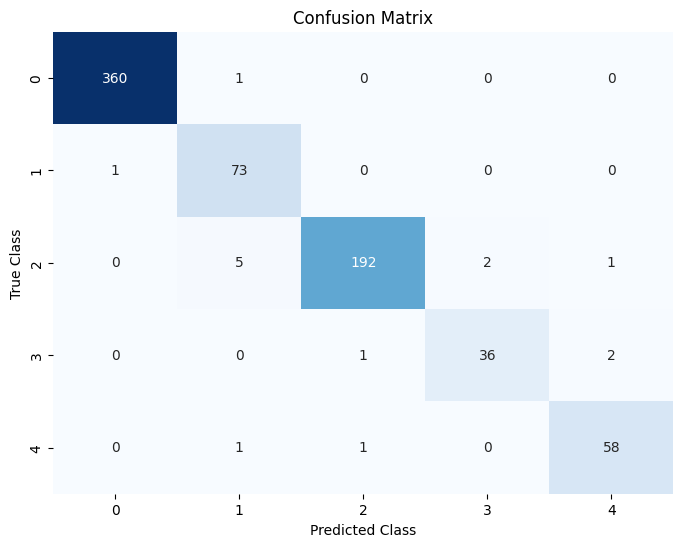

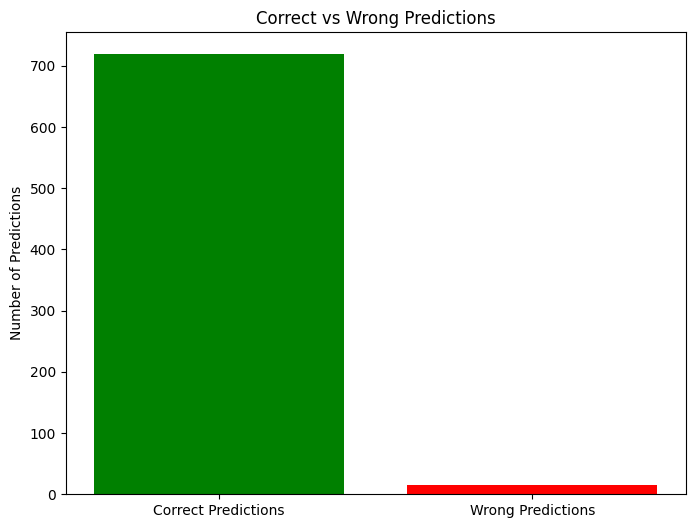

Training and validation metrics cannot be plotted as you loaded a pre-trained model. You don't have the training history.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the pre-trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/optimized_cnn_model_2.h5')

# Directory for test data
test_dir = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/testing'

# Image dimensions
img_height, img_width = 224, 224

# Prepare the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize images as done during training

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important to set shuffle=False to match predictions to filenames
)

# Make predictions
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = test_generator.classes

# Class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Calculate accuracy, precision, recall, and f1-score
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Precision: {:.2f}%'.format(precision * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('F1 Score: {:.2f}%'.format(f1 * 100))

# Print classification report
print('\nClassification Report')
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print confusion matrix in tabular form
print('\nConfusion Matrix (Tabular Form)')
print(cm)

# Calculate the total number of incorrect predictions
total_incorrect = np.sum(cm) - np.trace(cm)
print("\nTotal incorrect predictions:", total_incorrect)

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Plot correct vs. wrong predictions
total_predictions = np.sum(cm)
correct_predictions = np.trace(cm)  # Sum of diagonal elements (correct predictions)
wrong_predictions = total_predictions - correct_predictions  # All other elements are wrong predictions

plt.figure(figsize=(8, 6))
plt.bar(['Correct Predictions', 'Wrong Predictions'], [correct_predictions, wrong_predictions], color=['green', 'red'])
plt.title('Correct vs Wrong Predictions')
plt.ylabel('Number of Predictions')
plt.show()

# Note: You cannot plot training and validation metrics as you don't have the training history.
print("Training and validation metrics cannot be plotted as you loaded a pre-trained model. You don't have the training history.")


In [ ]:
#predicting the single images
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/optimized_cnn_model_2.h5')

# Load and preprocess the image
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    return img_array

# Make a prediction
def predict_image(model, img_path, class_indices):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in class_indices.items()}
    return class_labels[predicted_class], prediction

# Example usage
img_path = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/testing/2/cd9e2190c73f.png'  # Replace with your image path
class_indices = train_generator.class_indices  # Get the class indices from the training generator
predicted_label, prediction = predict_image(model, img_path, class_indices)

print(f"Predicted label: {predicted_label}")
print(f"Prediction probabilities: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
Predicted label: 2
Prediction probabilities: [[0.01723337 0.15043473 0.75092083 0.00724524 0.07416588]]


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/optimized_cnn_model_2.h5')
img_path = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/testing/2/cd9e2190c73f.png'  # Replace with your image path
def preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize to [0, 1] range
    return img_array
def predict_image(model, img_path):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class, prediction # Return both predicted class and probabilities

# Predict
predicted_label, prediction = predict_image(model, img_path) # Unpack both returned values

print(f"Predicted label: {predicted_label}")
print(f"Prediction probabilities: {prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
Predicted label: 2
Prediction probabilities: [[0.01723337 0.15043473 0.75092083 0.00724524 0.07416588]]


checking with the extracted features


Epoch 1/30
115/115 [==============================] - 3s 15ms/step - loss: 1.2152 - accuracy: 0.7245 - val_loss: 0.6569 - val_accuracy: 0.9196
Epoch 2/30
115/115 [==============================] - 1s 12ms/step - loss: 0.7019 - accuracy: 0.8960 - val_loss: 0.4868 - val_accuracy: 0.9728
Epoch 3/30
115/115 [==============================] - 1s 12ms/step - loss: 0.5472 - accuracy: 0.9522 - val_loss: 0.4402 - val_accuracy: 0.9823
Epoch 4/30
115/115 [==============================] - 1s 13ms/step - loss: 0.4817 - accuracy: 0.9691 - val_loss: 0.4020 - val_accuracy: 0.9837
Epoch 5/30
115/115 [==============================] - 1s 12ms/step - loss: 0.4456 - accuracy: 0.9760 - val_loss: 0.3815 - val_accuracy: 0.9877
Epoch 6/30
115/115 [==============================] - 1s 12ms/step - loss: 0.4211 - accuracy: 0.9771 - val_loss: 0.3746 - val_accuracy: 0.9891
Epoch 7/30
115/115 [==============================] - 1s 12ms/step - loss: 0.4019 - accuracy: 0.9795 - val_loss: 0.3594 - val_accuracy: 0.9891

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


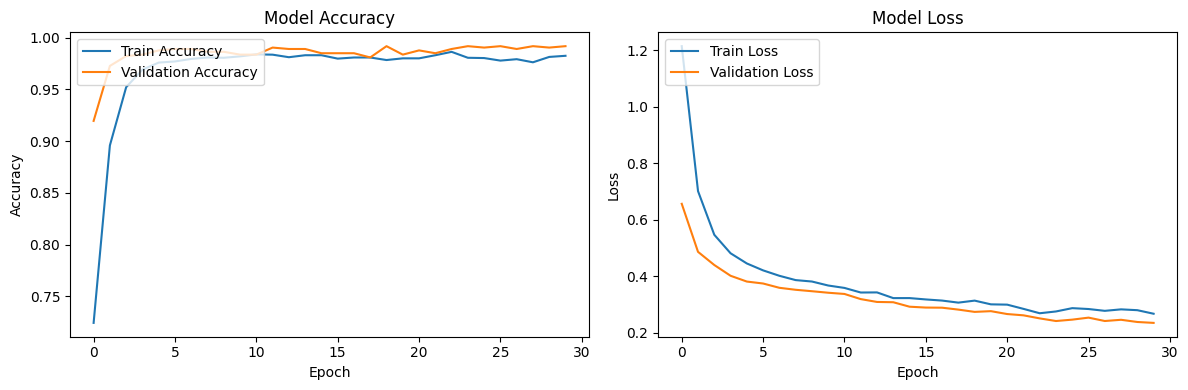

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt

# Assuming train_features, val_features, train_labels, and val_labels are already defined

# Parameters
learning_rate = 0.0002917752847222896
dropout_rate = 0.1202509048409723
neurons_layer1 = 150
neurons_layer2 = 94
num_classes = 5
epochs = 30
batch_size = 32

# Feature Scaling
scaler = StandardScaler()

# Fit and transform the training features
X_train_scaled = scaler.fit_transform(train_features)

# Transform the validation features using the fitted scaler
X_val_scaled = scaler.transform(val_features)

# Save the scaler using joblib or pickle
with open('/content/drive/MyDrive/standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Build the model to train on extracted features
model = models.Sequential()
model.add(layers.Input(shape=X_train_scaled.shape[1:]))
model.add(layers.Flatten())
model.add(layers.Dense(neurons_layer1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout_rate))  # Increased dropout
model.add(layers.Dense(neurons_layer2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout_rate))  # Increased dropout
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on scaled features
history = model.fit(
    X_train_scaled, train_labels,
    epochs=epochs,
    validation_data=(X_val_scaled, val_labels),
    batch_size=batch_size
)

# Evaluate the model on validation set
test_loss, test_acc = model.evaluate(X_val_scaled, val_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

model.save('/content/drive/MyDrive/optimized_extracted_model_gwo_1.h5')

# Save the model's architecture and weights separately
model_structure = model.to_json()
model_weights = model.get_weights()

# Serialize the architecture and weights using pickle
with open('model_structure.pkl', 'wb') as file:
    pickle.dump(model_structure, file)

with open('model_weights.pkl', 'wb') as file:
    pickle.dump(model_weights, file)

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


23/23 [==============================] - 0s 3ms/step
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Number of wrong predictions: 6
Confusion Matrix:
[[361   0   0   0   0]
 [  0  74   0   0   0]
 [  0   1 199   0   0]
 [  0   0   3  35   1]
 [  0   0   1   0  59]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       361
           1       0.99      1.00      0.99        74
           2       0.98      0.99      0.99       200
           3       1.00      0.90      0.95        39
           4       0.98      0.98      0.98        60

    accuracy                           0.99       734
   macro avg       0.99      0.98      0.98       734
weighted avg       0.99      0.99      0.99       734



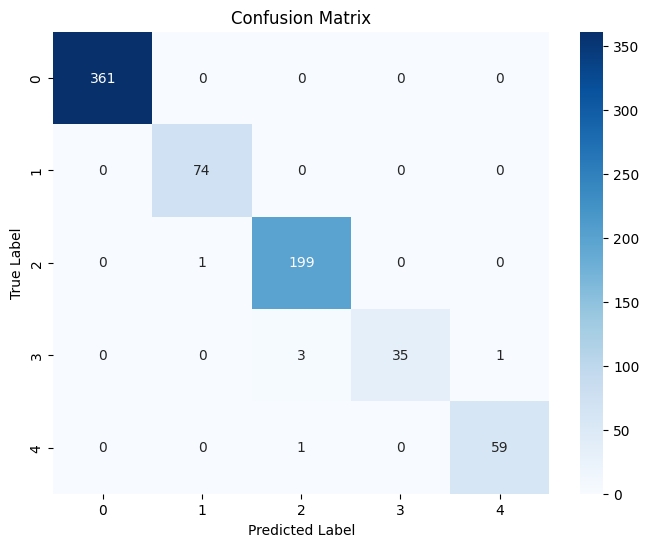

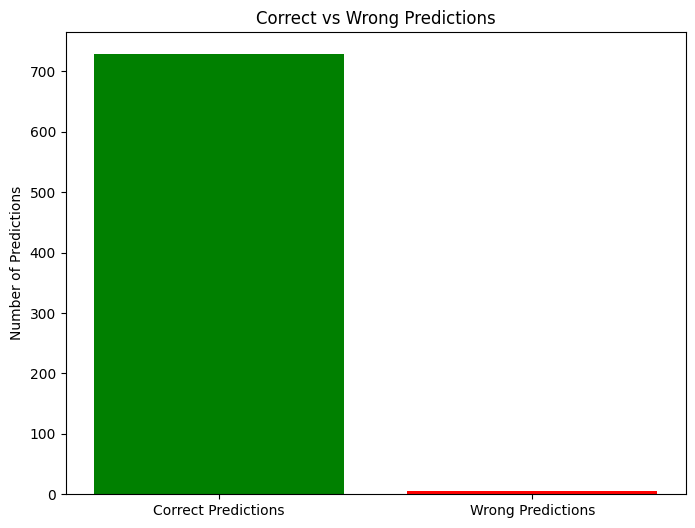

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the model
model = tf.keras.models.load_model('/content/drive/MyDrive/optimized_extracted_model_gwo_1.h5')

# Predict on validation data
y_pred = model.predict(X_val_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(val_labels, axis=1)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Calculate the number of wrong predictions
wrong_predictions = np.sum(y_pred_classes != y_true_classes)
correct_predictions = len(y_true_classes) - wrong_predictions

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Number of wrong predictions: {wrong_predictions}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true_classes, y_pred_classes))

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot correct vs. wrong predictions
plt.figure(figsize=(8, 6))
plt.bar(['Correct Predictions', 'Wrong Predictions'], [correct_predictions, wrong_predictions], color=['green', 'red'])
plt.title('Correct vs Wrong Predictions')
plt.ylabel('Number of Predictions')
plt.show()


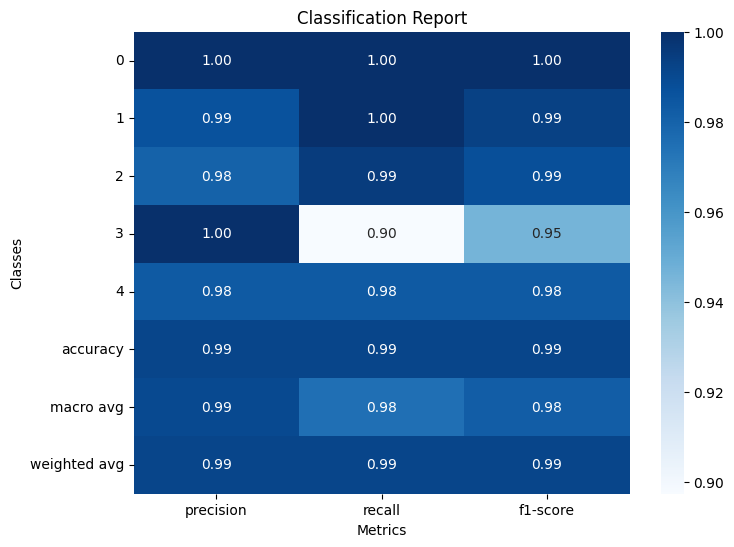

In [ ]:
# prompt: plot the classification report for the above model

import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install seaborn
import seaborn as sns # Added this line to import the seaborn library

# Assuming y_true and y_pred are already defined

report = classification_report(y_true_classes, y_pred_classes ,output_dict=True)

# Plotting the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Alternatively, you can use ConfusionMatrixDisplay for a more visual representation


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import joblib



# Load the scaler
scaler = joblib.load('/content/drive/MyDrive/standard_scaler.pkl')

def extract_features(img_path, feature_extractor, target_size=(224, 224)):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocess the image for VGG16
    img_array = preprocess_input(img_array)

    # Extract features using the feature extractor model
    features = feature_extractor.predict(img_array)

    # Flatten the features to match the model input shape
    features_flat = features.reshape((features.shape[0], -1))

    # Scale the features using the loaded scaler
    features_scaled = scaler.transform(features_flat)

    # Select the relevant features based on the selected feature indices


    return features_scaled

def predict_single_image(model, img_path, feature_extractor):
    # Extract features from the image
    selected_features = extract_features(img_path, feature_extractor)

    # Ensure the feature shape matches what the model expects
    if selected_features.shape[1] != model.input_shape[1]:
        raise ValueError(f"Feature shape {selected_features.shape[1]} does not match model input shape {model.input_shape[1]}.")

    # Make prediction
    predictions = model.predict(selected_features)
    predicted_class = np.argmax(predictions, axis=1)

    return predicted_class

# Load the trained model
model = load_model('/content/drive/MyDrive/optimized_extracted_model_gwo_1.h5')

# Load VGG16 for feature extraction
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model that outputs the features from the last convolutional block
feature_extractor = Model(inputs=vgg16_model.input, outputs=vgg16_model.output)

# Example usage
img_path = '/content/drive/MyDrive/dataset/preprocessed dataset/preprocessed dataset/testing/0/d1fa0f744620.png'
predicted_class = predict_single_image(model, img_path, feature_extractor)
print(f"Predicted Class: {predicted_class}")


1/1 [==============================] - 0s 98ms/step
Predicted Class: [0]


ACO

In [ ]:
def aco_objective_function(params):
    # Extract hyperparameters
    num_neurons1 = int(params[0])
    num_neurons2 = int(params[1])
    learning_rate = params[2]
    dropout_rate = np.clip(params[3], 0.0, 0.99)  # Ensure dropout rate is within valid range [0, 1)

    # Feature selection part
    feature_mask = params[4:]  # Remaining part of params represents feature inclusion/exclusion
    selected_features = np.where(np.array(feature_mask) >= 0.5, True, False)  # Threshold to select features

    X_train_selected = X_train_scaled[:, selected_features]  # Select only the features chosen by the mask
    X_val_selected = X_val_scaled[:, selected_features]

    # Build and compile the model
    model = Sequential([
        Dense(num_neurons1, activation='relu', input_shape=(X_train_selected.shape[1],)),
        Dropout(dropout_rate),
        Dense(num_neurons2, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss=CategoricalCrossentropy(),
                  metrics=['accuracy'])

    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train_selected, train_labels, epochs=5, batch_size=32, verbose=0,
              validation_data=(X_val_selected, val_labels), callbacks=[early_stopping],
              class_weight=class_weights_dict)

    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(X_val_selected, val_labels, verbose=0)
    return -val_accuracy  # Return negative accuracy as we're minimizing


In [ ]:
def aco_optimize(obj_function, num_ants, num_iterations, dim, lower_bound, upper_bound, num_features, evaporation_rate=0.5, alpha=1.0, beta=1.0):
    pheromones = np.ones((dim + num_features, 2))  # 2 columns, one for each possible choice (0 or 1)
    heuristic = np.ones((dim + num_features, 2))

    best_solution = None
    best_score = float('inf')

    for iteration in range(num_iterations):
        all_solutions = []
        all_scores = []

        for ant in range(num_ants):
            solution = []
            feature_selection = []

            # Hyperparameter selection
            for i in range(dim):
                probabilities = pheromones[i] ** alpha * heuristic[i] ** beta
                probabilities = np.clip(probabilities, 1e-10, None)
                probabilities_sum = probabilities.sum()

                if probabilities_sum > 0:
                    probabilities /= probabilities_sum
                else:
                    probabilities = np.ones(2) / 2

                choice = np.random.choice([0, 1], p=probabilities)  # Choose between 0 and 1
                param_value = np.random.uniform(lower_bound[i], upper_bound[i])
                solution.append(param_value)

            # Feature selection
            for j in range(num_features):
                probabilities = pheromones[dim + j] ** alpha * heuristic[dim + j] ** beta
                probabilities = np.clip(probabilities, 1e-10, None)
                probabilities_sum = probabilities.sum()

                if probabilities_sum > 0:
                    probabilities /= probabilities_sum
                else:
                    probabilities = np.ones(2) / 2

                feature_choice = np.random.choice([0, 1], p=probabilities)
                feature_selection.append(feature_choice)

            complete_solution = solution + feature_selection
            score = obj_function(complete_solution)
            all_solutions.append(complete_solution)
            all_scores.append(score)

            if score < best_score:
                best_score = score
                best_solution = complete_solution

        # Update pheromones
        for i in range(dim + num_features):
            pheromones[i] *= (1 - evaporation_rate)
            for ant in range(num_ants):
                param_choice = int(all_solutions[ant][i] >= 0.5)  # Choose between 0 and 1

                if param_choice < pheromones.shape[1]:  # Ensure we're within bounds
                    pheromones[i, param_choice] += 1 / (all_scores[ant] + 1e-10)

        print(f"Iteration {iteration+1}/{num_iterations}, Best Score: {-best_score}")

    return best_solution, best_score


In [ ]:
import pickle
num_ants = 10
num_iterations = 20
dim = 4  # Number of hyperparameters
num_features = X_train_scaled.shape[1]  # Number of features to select from
lower_bound = [16, 16, 0.0001, 0.0]  # Hyperparameters lower bounds
upper_bound = [256, 256, 0.01, 1.0]  # Hyperparameters upper bounds

# Run ACO optimization
best_params, best_score = aco_optimize(
    aco_objective_function,
    num_ants,
    num_iterations,
    dim,
    lower_bound,
    upper_bound,
    num_features
)

# Extract the best hyperparameters and feature mask
num_neurons1 = int(best_params[0])
num_neurons2 = int(best_params[1])
learning_rate = best_params[2]
dropout_rate = best_params[3]
feature_mask = best_params[4:]  # The remaining parameters are the feature mask

selected_feature_indices = np.where(np.array(feature_mask) >= 0.5)[0]  # Indices of selected features

print(f"Best Hyperparameters:")
print(f"Number of neurons in layer 1: {num_neurons1}")
print(f"Number of neurons in layer 2: {num_neurons2}")
print(f"Learning rate: {learning_rate}")
print(f"Dropout rate: {dropout_rate}")
print(f"Selected features: {selected_feature_indices}")  # Indices of selected features
print(f"Number of selected features: {len(selected_feature_indices)}")  # Print the number of selected features

print(f"Best validation score: {-best_score}")

# Save the selected features to a file
with open('/content/drive/MyDrive/selected_features.pkl', 'wb') as file:
    pickle.dump(selected_feature_indices, file)

print("Selected features saved successfully!")

Iteration 1/20, Best Score: 0.9809264540672302
Iteration 2/20, Best Score: 0.9809264540672302
Iteration 3/20, Best Score: 0.9809264540672302
Iteration 4/20, Best Score: 0.9809264540672302
Iteration 5/20, Best Score: 0.9809264540672302
Iteration 6/20, Best Score: 0.9809264540672302
Iteration 7/20, Best Score: 0.9809264540672302
Iteration 8/20, Best Score: 0.9809264540672302
Iteration 9/20, Best Score: 0.9809264540672302
Iteration 10/20, Best Score: 0.9809264540672302
Iteration 11/20, Best Score: 0.9809264540672302
Iteration 12/20, Best Score: 0.9863760471343994
Iteration 13/20, Best Score: 0.9863760471343994
Iteration 14/20, Best Score: 0.9863760471343994
Iteration 15/20, Best Score: 0.9863760471343994
Iteration 16/20, Best Score: 0.9863760471343994
Iteration 17/20, Best Score: 0.9863760471343994
Iteration 18/20, Best Score: 0.9863760471343994
Iteration 19/20, Best Score: 0.9863760471343994
Iteration 20/20, Best Score: 0.9863760471343994
Best Hyperparameters:
Number of neurons in layer 

In [ ]:
# Iteration 1/20, Best Score: 0.9809264540672302
# Iteration 2/20, Best Score: 0.9809264540672302
# Iteration 3/20, Best Score: 0.9809264540672302
# Iteration 4/20, Best Score: 0.9809264540672302
# Iteration 5/20, Best Score: 0.9809264540672302
# Iteration 6/20, Best Score: 0.9809264540672302
# Iteration 7/20, Best Score: 0.9809264540672302
# Iteration 8/20, Best Score: 0.9809264540672302
# Iteration 9/20, Best Score: 0.9809264540672302
# Iteration 10/20, Best Score: 0.9809264540672302
# Iteration 11/20, Best Score: 0.9809264540672302
# Iteration 12/20, Best Score: 0.9863760471343994
# Iteration 13/20, Best Score: 0.9863760471343994
# Iteration 14/20, Best Score: 0.9863760471343994
# Iteration 15/20, Best Score: 0.9863760471343994
# Iteration 16/20, Best Score: 0.9863760471343994
# Iteration 17/20, Best Score: 0.9863760471343994
# Iteration 18/20, Best Score: 0.9863760471343994
# Iteration 19/20, Best Score: 0.9863760471343994
# Iteration 20/20, Best Score: 0.9863760471343994
# Best Hyperparameters:
# Number of neurons in layer 1: 133
# Number of neurons in layer 2: 205
# Learning rate: 0.0003106752334611529
# Dropout rate: 0.0752023238067
# Selected features: [    1     2     4 ... 25085 25086 25087]
# Number of selected features: 12525
# Best validation score: 0.9863760471343994
# Selected features saved successfully!

Epoch 1/25
115/115 [==============================] - 2s 11ms/step - loss: 1.2892 - accuracy: 0.7051 - val_loss: 0.7276 - val_accuracy: 0.8896
Epoch 2/25
115/115 [==============================] - 1s 9ms/step - loss: 0.6959 - accuracy: 0.9020 - val_loss: 0.5176 - val_accuracy: 0.9755
Epoch 3/25
115/115 [==============================] - 1s 8ms/step - loss: 0.5467 - accuracy: 0.9519 - val_loss: 0.4520 - val_accuracy: 0.9864
Epoch 4/25
115/115 [==============================] - 1s 9ms/step - loss: 0.4821 - accuracy: 0.9730 - val_loss: 0.4251 - val_accuracy: 0.9850
Epoch 5/25
115/115 [==============================] - 1s 9ms/step - loss: 0.4542 - accuracy: 0.9784 - val_loss: 0.4173 - val_accuracy: 0.9850
Epoch 6/25
115/115 [==============================] - 1s 9ms/step - loss: 0.4410 - accuracy: 0.9773 - val_loss: 0.3851 - val_accuracy: 0.9905
Epoch 7/25
115/115 [==============================] - 1s 9ms/step - loss: 0.4184 - accuracy: 0.9817 - val_loss: 0.3889 - val_accuracy: 0.9850
Epoch

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


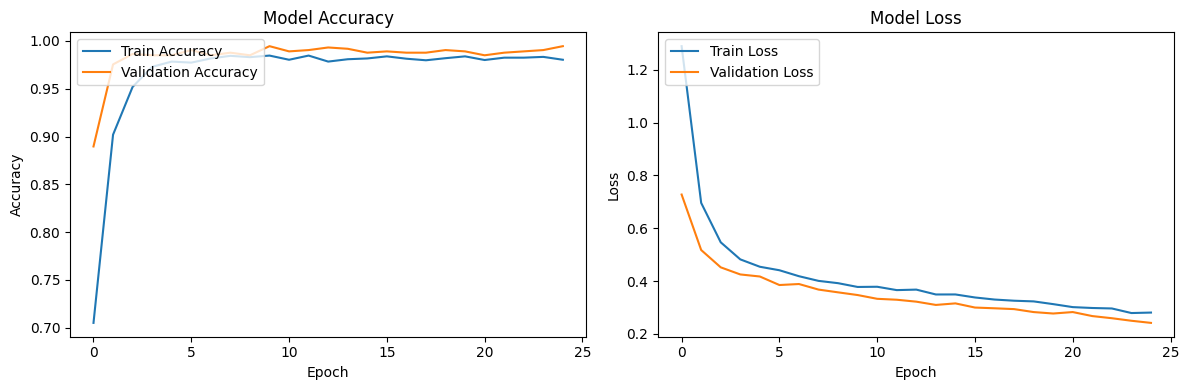

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import StandardScaler
import pickle
import matplotlib.pyplot as plt

# Assuming train_features, val_features, train_labels, and val_labels are already defined

# Parameters from the ACO optimization
learning_rate = 0.0003106752334611529
dropout_rate = 0.0752023238067
neurons_layer1 = 133
neurons_layer2 = 205
num_classes = 5
epochs = 25
batch_size = 32

# Extract selected feature indices from ACO optimization
# Assuming `best_params` is the output from your ACO optimization code
feature_mask = best_params[4:]  # The remaining parameters are the feature mask
selected_feature_indices = np.where(np.array(feature_mask) >= 0.5)[0]  # Indices of selected features

# Save the selected feature indices
with open('/content/drive/MyDrive/selected_feature_indices.pkl', 'wb') as f:
    pickle.dump(selected_feature_indices, f)

# Load selected features
X_train_scaled1 = X_train_scaled[:, selected_feature_indices]
X_val_scaled1 = X_val_scaled[:, selected_feature_indices]

# Feature Scaling
scaler = StandardScaler()


# Save the scaler using joblib or pickle
with open('/content/drive/MyDrive/standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Build the model to train on extracted features
model = models.Sequential()
model.add(layers.Input(shape=(X_train_scaled1.shape[1],)))
model.add(layers.Dense(neurons_layer1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout_rate))  # Use optimized dropout rate
model.add(layers.Dense(neurons_layer2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(dropout_rate))  # Use optimized dropout rate
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on scaled features
history = model.fit(
    X_train_scaled1, train_labels,
    epochs=epochs,
    validation_data=(X_val_scaled1, val_labels),
    batch_size=batch_size
)

# Evaluate the model on validation set
test_loss, test_acc = model.evaluate(X_val_scaled1, val_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

# Save the trained model
model.save('/content/drive/MyDrive/optimized_extracted_model_1.h5')

# Save the model's architecture and weights separately
model_structure = model.to_json()
model_weights = model.get_weights()

# Serialize the architecture and weights using pickle
with open('model_structure.pkl', 'wb') as file:
    pickle.dump(model_structure, file)

with open('model_weights.pkl', 'wb') as file:
    pickle.dump(model_weights, file)

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


Number of selected features: 12525
23/23 [==============================] - 0s 2ms/step
Prediction Accuracy: 0.9945504087193461

Overall Precision: 0.9946298476944211
Overall Recall: 0.9945504087193461
Overall F1 Score: 0.9945700026802474

Classification Report:
              precision    recall  f1-score    support
0              1.000000  1.000000  1.000000  361.00000
1              0.986667  1.000000  0.993289   74.00000
2              0.994975  0.990000  0.992481  200.00000
3              0.950000  0.974359  0.962025   39.00000
4              1.000000  0.983333  0.991597   60.00000
accuracy       0.994550  0.994550  0.994550    0.99455
macro avg      0.986328  0.989538  0.987878  734.00000
weighted avg   0.994630  0.994550  0.994570  734.00000

Confusion Matrix (Array Format):
[[361   0   0   0   0]
 [  0  74   0   0   0]
 [  0   1 198   1   0]
 [  0   0   1  38   0]
 [  0   0   0   1  59]]

Confusion Matrix (Table Format):
        Predicted 0  Predicted 1  Predicted 2  Predicted 3

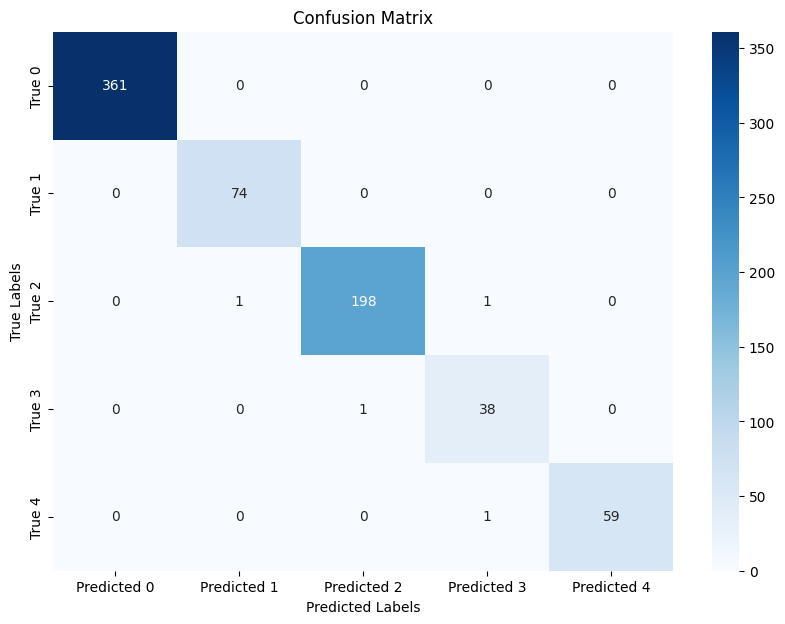


Number of Correct Predictions: 730
Number of Incorrect Predictions: 4


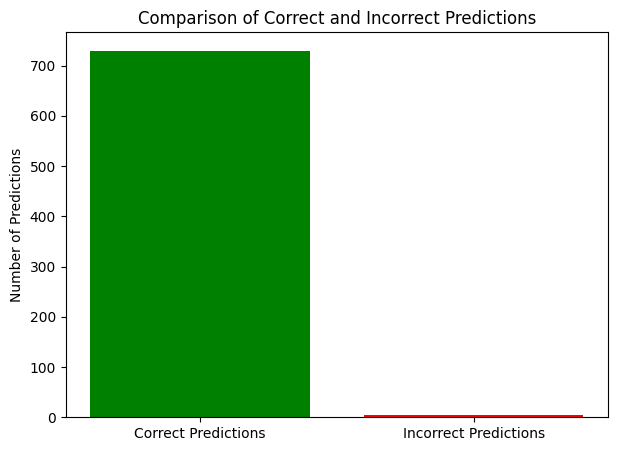


First 5 Incorrect Predictions:
Index: 530, Predicted: 1, True: 2
Index: 594, Predicted: 3, True: 2
Index: 640, Predicted: 2, True: 3
Index: 718, Predicted: 3, True: 4


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the model
model = load_model('/content/drive/MyDrive/optimized_extracted_model_1.h5')

# Load selected features indices
selected_features = np.load('/content/drive/MyDrive/selected_feature_indices.pkl', allow_pickle=True)
print(f"Number of selected features: {len(selected_features)}")

# Function to select features based on indices
def select_features(X, selected_features):
    return X[:, selected_features]

# Assuming X_val_scaled is already loaded and scaled
# Select features for validation data
X_val_selected = select_features(X_val_scaled, selected_features)

# Predict using the selected features
predictions = model.predict(X_val_selected)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(val_labels, axis=1)

# Calculate overall accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Prediction Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f"\nOverall Precision: {precision}")
print(f"Overall Recall: {recall}")
print(f"Overall F1 Score: {f1}")

# Print classification report
report = classification_report(true_labels, predicted_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report:")
print(report_df)

# Print confusion matrix as an array
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix (Array Format):")
print(conf_matrix)

# Convert confusion matrix to DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=[f"True {i}" for i in range(conf_matrix.shape[0])],
                              columns=[f"Predicted {i}" for i in range(conf_matrix.shape[1])])
print("\nConfusion Matrix (Table Format):")
print(conf_matrix_df)

# Plot the confusion matrix as an image
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Calculate the number of correct and incorrect predictions
correct_predictions = np.where(predicted_labels == true_labels)[0]
incorrect_predictions = np.where(predicted_labels != true_labels)[0]

num_correct = len(correct_predictions)
num_incorrect = len(incorrect_predictions)

# Print the number of correct and incorrect predictions
print(f"\nNumber of Correct Predictions: {num_correct}")
print(f"Number of Incorrect Predictions: {num_incorrect}")

# Create a bar plot to compare correct and incorrect predictions
plt.figure(figsize=(7, 5))
labels = ['Correct Predictions', 'Incorrect Predictions']
counts = [num_correct, num_incorrect]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Comparison of Correct and Incorrect Predictions')
plt.ylabel('Number of Predictions')
plt.show()

# Optionally, you can inspect the first few incorrect predictions
print(f"\nFirst 5 Incorrect Predictions:")
for i in incorrect_predictions[:5]:
    print(f"Index: {i}, Predicted: {predicted_labels[i]}, True: {true_labels[i]}")


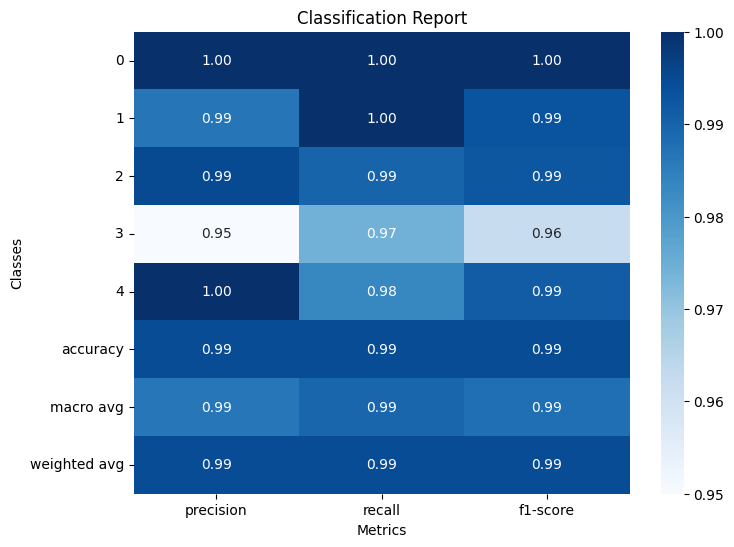

In [ ]:
# prompt: plot the classification report for the above model

import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
!pip install seaborn
import seaborn as sns # Added this line to import the seaborn library

# Assuming y_true and y_pred are already defined

report = classification_report(true_labels, predicted_labels, output_dict=True)

# Plotting the classification report
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, fmt=".2f", cmap="Blues")
plt.title("Classification Report")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

# Alternatively, you can use ConfusionMatrixDisplay for a more visual representation
